# Import libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor
import json
import warnings
import session_info

# Import external files

- Extension of the "missing" functions from Pandas
- DataFrame and dictionary functions

In [39]:
%run utils/u.0.0-pandas_missing_extension.ipynb

In [40]:
%run utils/u.0.1-df_functions.ipynb

# Get the interim data

In [41]:
arg_di_df = pd.read_csv("../data/interim/WDICSV_INTERIM.csv").clean_names(case_type="snake")

print("DataFrame Shape")
print(arg_di_df.shape)

DataFrame Shape
(64, 97)


# Set initial plots styles

In [42]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

# Explore data

## General information

In [43]:
print("DataFrame Info")
arg_di_df.info()

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      64 non-null     int64  
 1   eg_elc_accs_zs            33 non-null     float64
 2   fx_own_totl_zs            4 non-null      float64
 3   fx_own_totl_ol_zs         4 non-null      float64
 4   fx_own_totl_40_zs         4 non-null      float64
 5   fx_own_totl_pl_zs         4 non-null      float64
 6   fx_own_totl_60_zs         4 non-null      float64
 7   fx_own_totl_so_zs         4 non-null      float64
 8   fx_own_totl_yg_zs         4 non-null      float64
 9   per_si_allsi_adq_pop_tot  12 non-null     float64
 10  per_allsp_adq_pop_tot     12 non-null     float64
 11  per_sa_allsa_adq_pop_tot  12 non-null     float64
 12  per_lm_alllm_adq_pop_tot  10 non-null     float64
 13  se_prm_tenr               26 non-null     float64
 1

## Add one column for years of military dictatorship

In [44]:
arg_di_df["year_of_dictatorship"] = arg_di_df["year"].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship)).astype(int)
set_new_dictionary_entry("It was a year of military dictatorship","year_of_dictatorship","year_of_dictatorship")

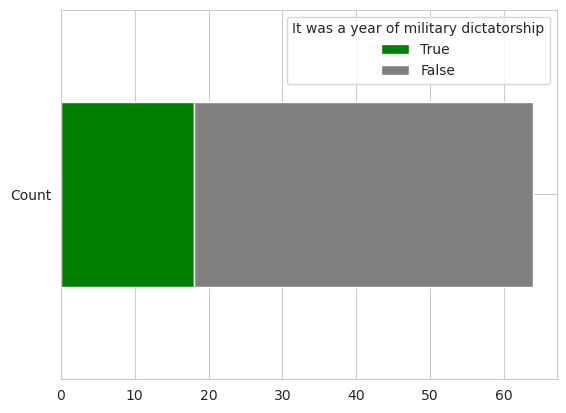

In [45]:
plot_count_of_years_of_military_dictatorship(arg_di_df)

In [46]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year_of_dictatorship'] == 1]

print("Years of military dictatorship")
arg_dictorship_years_df.shape[0]

Years of military dictatorship


18

## Missing data information

### Summaries

In [47]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
38,se_ter_cuat_ms_zs,64,64,100.0
14,sl_tlf_0714_sw_tm,64,64,100.0
39,se_ter_cuat_do_zs,64,64,100.0
34,se_sec_cuat_po_zs,64,64,100.0
32,se_ter_cuat_ba_zs,64,64,100.0
...,...,...,...,...
69,sp_pop_0014_to_zs,0,64,0.0
48,ny_gdp_pcap_kd,0,64,0.0
46,ny_gdp_mktp_kd,0,64,0.0
45,it_mlt_main,0,64,0.0


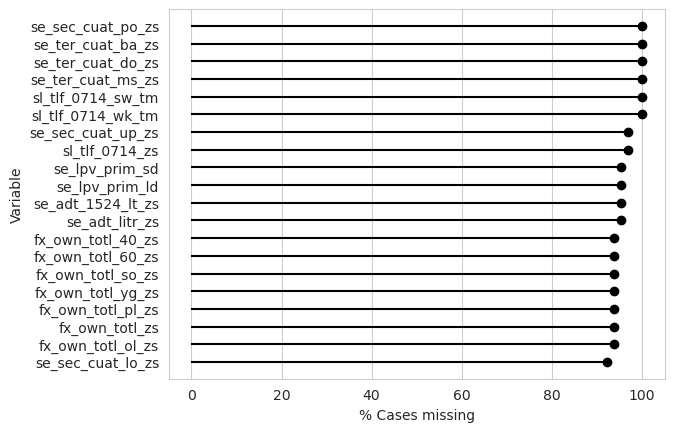

In [48]:
arg_di_df.rename(columns=df_dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(20)

### Filter rows and columns with many missing values

Compare the DataFrame resulting of changing the order of the filters (rows and columns)

In [49]:
print("Filtering columns and rows with less than 70% of missing values")
print(filter_by_cols_first(arg_di_df, 0.7).shape) # I obtain diffrent shapes when I change the percentage of missing values

print("Filtering rows and columns with less than 70% of missing values")
print(filter_by_rows_first(arg_di_df, 0.7).shape)

Filtering columns and rows with less than 70% of missing values
(54, 25)
Filtering rows and columns with less than 70% of missing values
(8, 71)


I'll work with the first option due to it has more rows and less columns

In [50]:
arg_di_df_best_cases = filter_by_cols_first(arg_di_df, 0.7)
arg_di_df_best_cases.head()

,year,it_mlt_main,ny_gdp_mktp_kd,ny_gdp_mktp_kd_zg,ny_gdp_pcap_kd,ny_gdp_pcap_kd_zg,sp_dyn_le00_in,it_cel_sets,sh_dth_imrt,sh_dth_mort,...,sm_pop_refg,sm_pop_refg_or,sp_rur_totl_zs,se_pre_enrr,se_prm_enrr,se_sec_enrr,se_ter_enrr,se_sec_durs,sp_urb_totl_in_zs,year_of_dictatorship
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,35000.0,NaN,21.120,23.44487,105.769478,44.709621,13.377590,5.0,78.880,1
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,34000.0,NaN,20.679,24.93766,106.752098,45.642109,15.440980,5.0,79.321,1
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,33000.0,NaN,20.257,26.51997,106.286819,47.472710,16.620810,5.0,79.743,1
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,37000.0,NaN,19.842,29.06558,105.710747,49.939709,19.751631,5.0,80.158,1
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,47000.0,NaN,19.433,31.40225,106.127319,52.762390,22.883011,5.0,80.567,0


(12, 25)

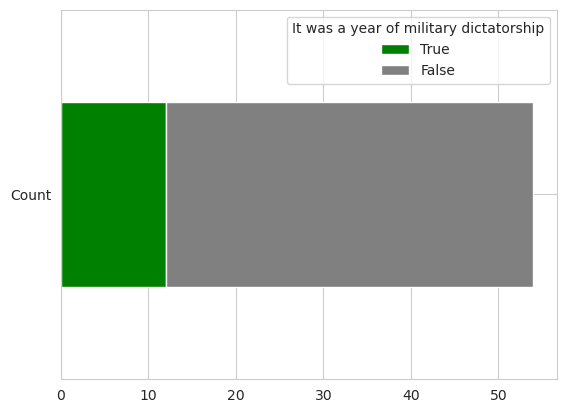

In [51]:
plot_count_of_years_of_military_dictatorship(arg_di_df_best_cases)
arg_di_df_best_cases[arg_di_df_best_cases['year_of_dictatorship'] == 1].shape

### Explore missing variables after the first data filtering

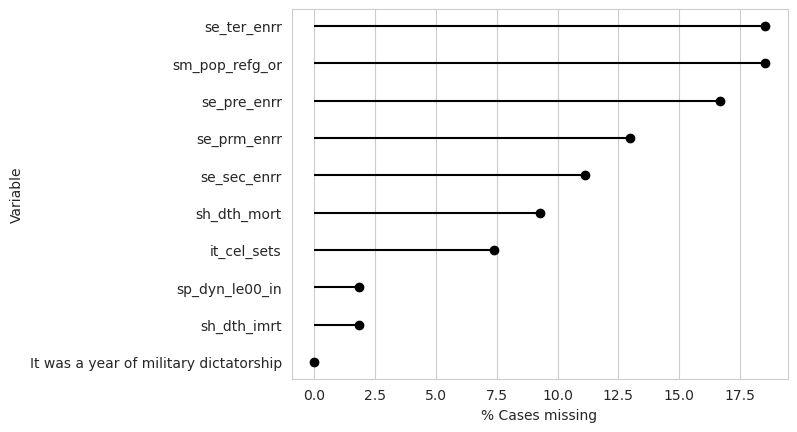

In [52]:
arg_di_df_best_cases.rename(columns=df_dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(10)

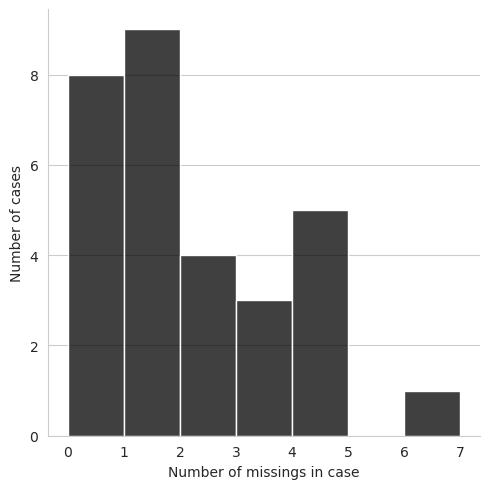

In [53]:
arg_di_df_best_cases.missing.missing_case_plot(30)

#### Columns with missing values

In [54]:
columns_with_missing_values = get_columns_with_missing_values(arg_di_df_best_cases)

for item in columns_with_missing_values:
    print(item + ": " + get_indicator_name(item, True))

se_ter_enrr: School enrollment, tertiary (% gross)
sm_pop_refg_or: Refugee population by country or territory of origin
se_pre_enrr: School enrollment, preprimary (% gross)
se_prm_enrr: School enrollment, primary (% gross)
se_sec_enrr: School enrollment, secondary (% gross)
sh_dth_mort: Number of under-five deaths
it_cel_sets: Mobile cellular subscriptions
sp_dyn_le00_in: Life expectancy at birth, total (years)
sh_dth_imrt: Number of infant deaths


Plot of the missing values. This doesn't show any pattern

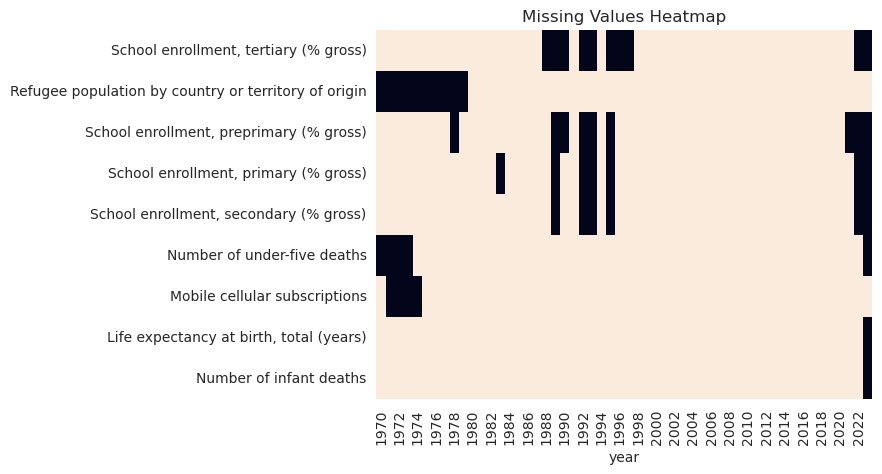

In [55]:
columns_with_names = [{item: get_indicator_name(item, True) for item in columns_with_missing_values}][0]
data = arg_di_df_best_cases[columns_with_missing_values + ['year']].rename(columns=columns_with_names).missing.sort_variables_by_missingness().sort_values(by="year").set_index('year')
sns.heatmap(~data.isnull().T,cbar=False,xticklabels="auto")
plt.title("Missing Values Heatmap")
plt.show()

Correlation between missing variables

{
  "se_ter_enrr": "School enrollment, tertiary (% gross)",
  "sm_pop_refg_or": "Refugee population by country or territory of origin",
  "se_pre_enrr": "School enrollment, preprimary (% gross)",
  "se_prm_enrr": "School enrollment, primary (% gross)",
  "se_sec_enrr": "School enrollment, secondary (% gross)",
  "sh_dth_mort": "Number of under-five deaths",
  "it_cel_sets": "Mobile cellular subscriptions",
  "sp_dyn_le00_in": "Life expectancy at birth, total (years)",
  "sh_dth_imrt": "Number of infant deaths"
}


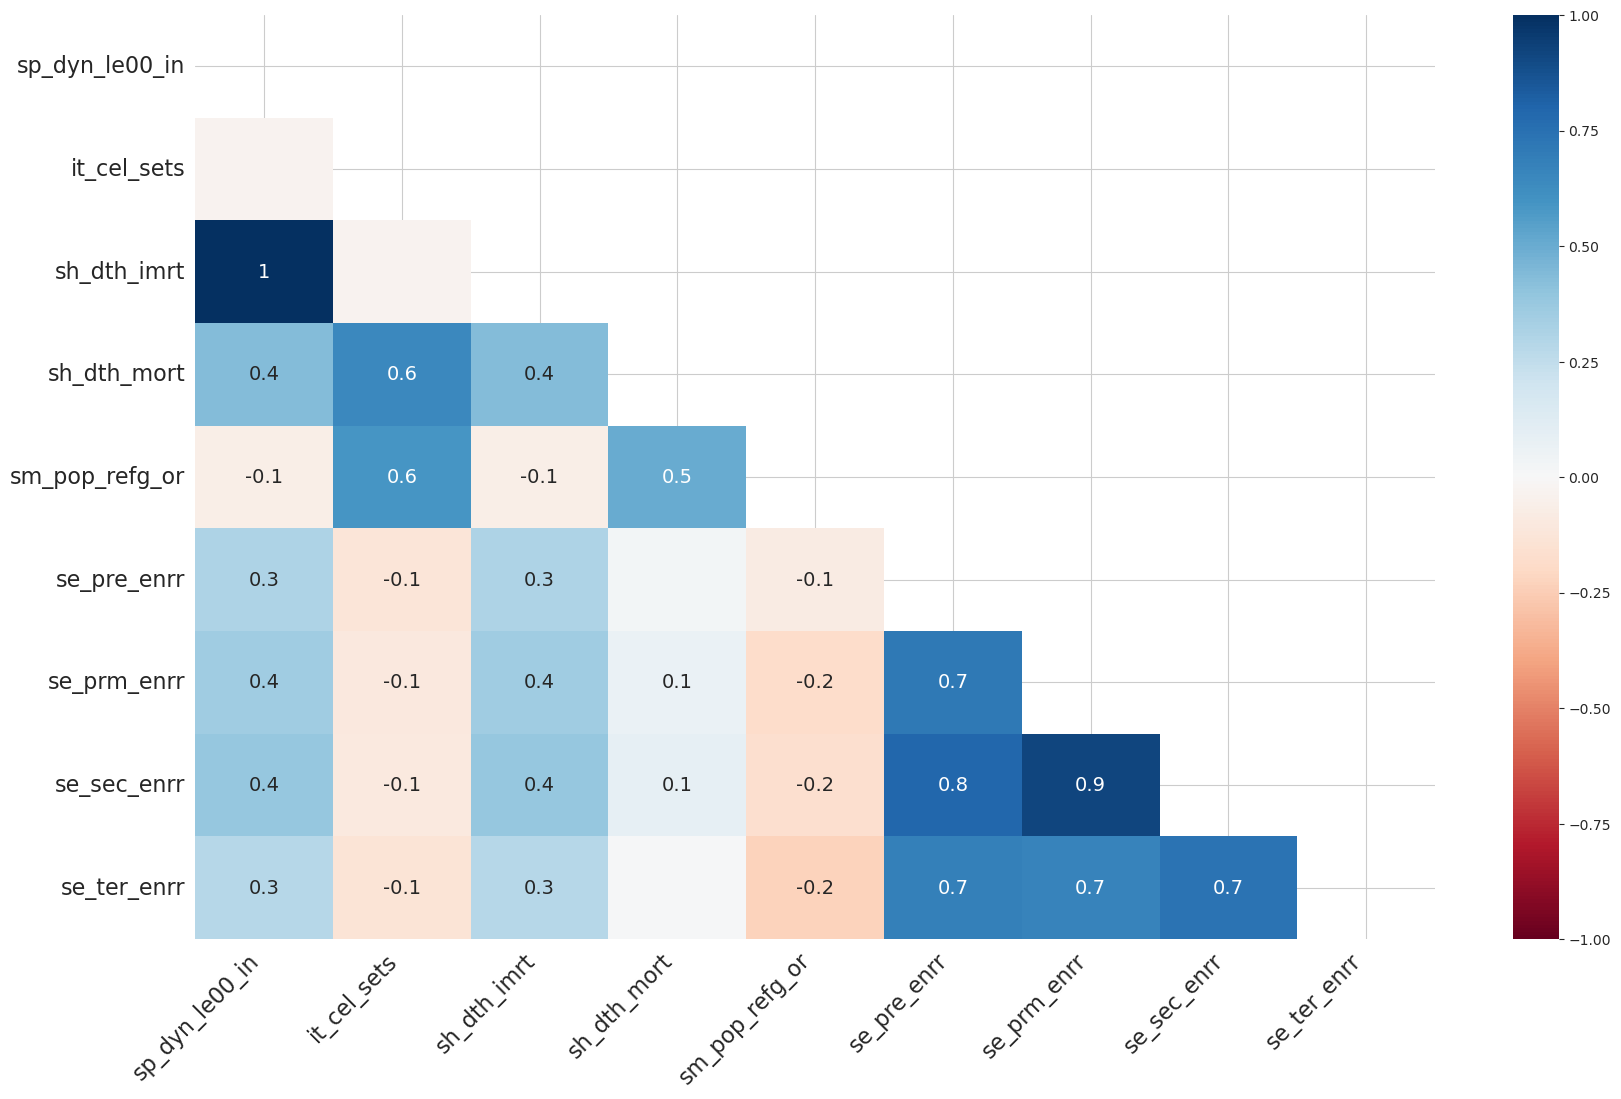

In [56]:
missingno.heatmap(df=arg_di_df_best_cases)
print(json.dumps(columns_with_names, indent=2))

Missing variables grouped by hierachical clusters with high correlation. *(Correlation is higher when the branchs are closer)* 

<Axes: >

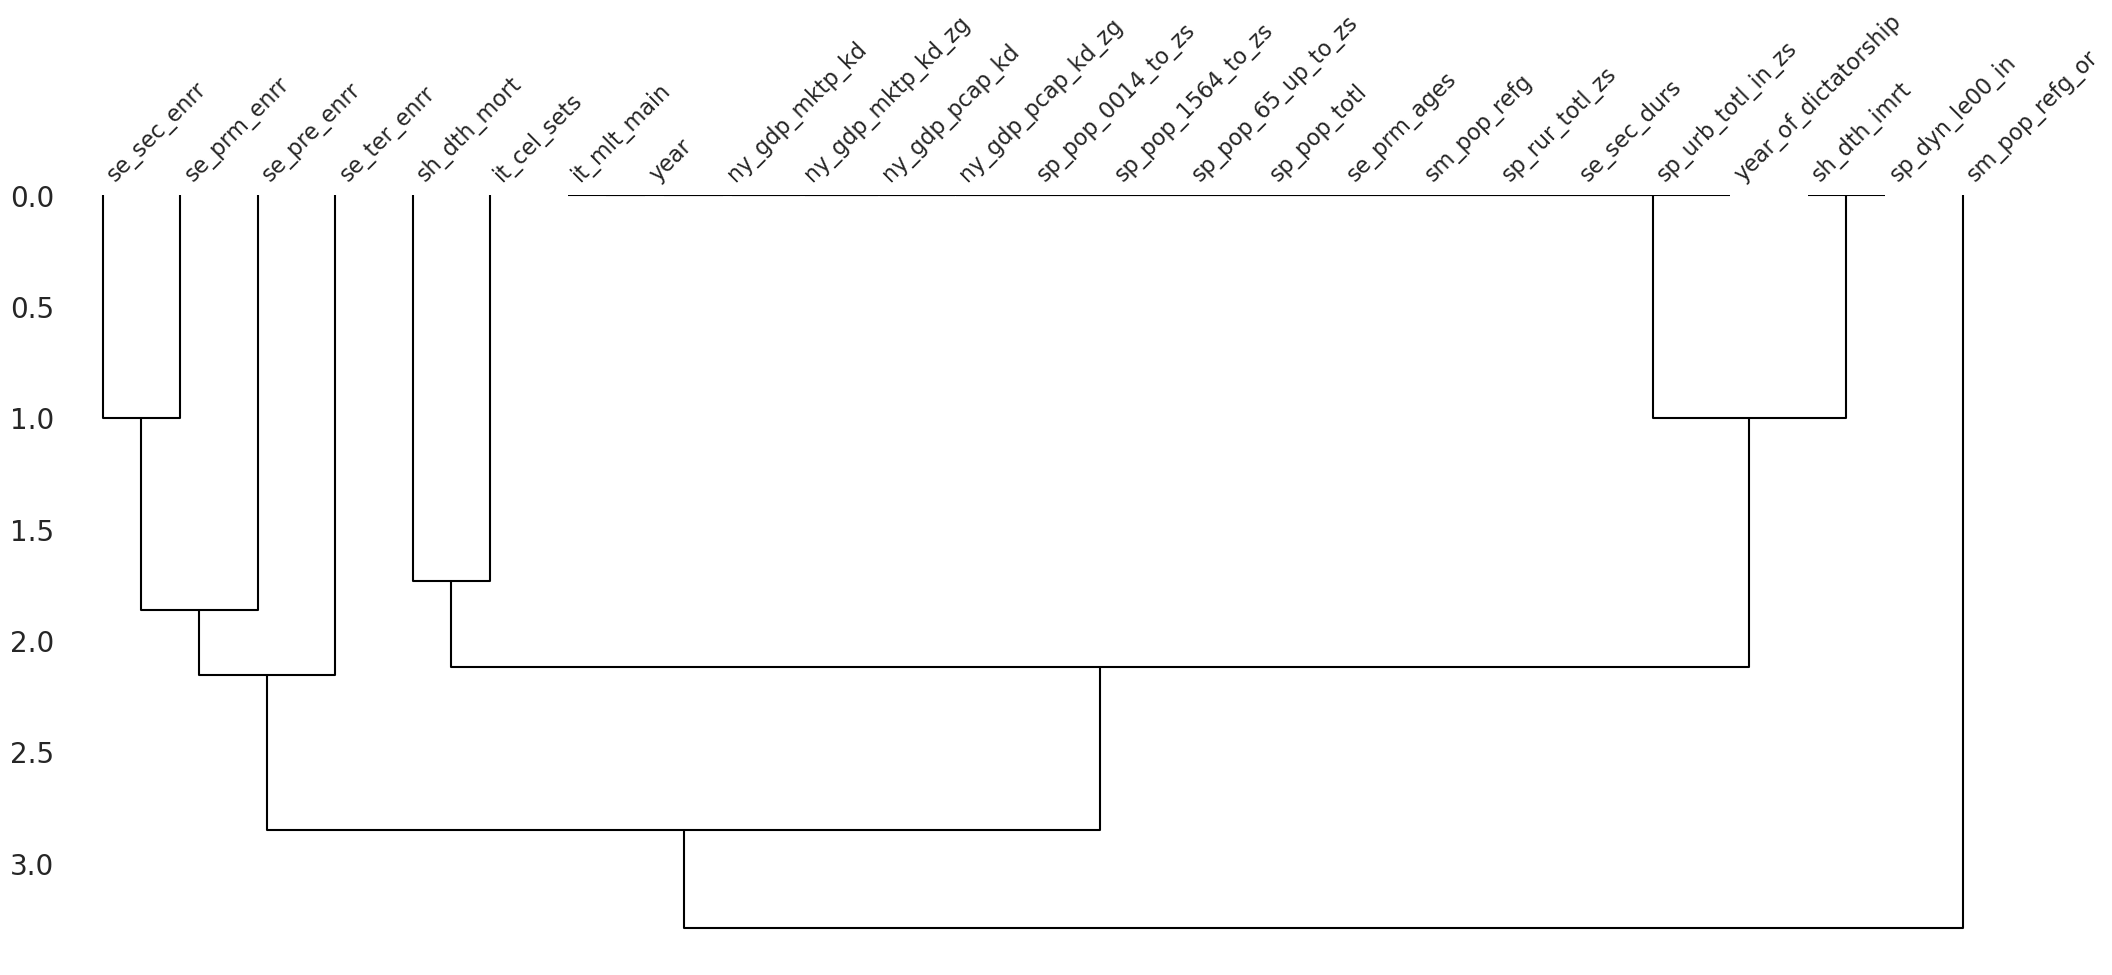

In [57]:
missingno.dendrogram(df=arg_di_df_best_cases)

An upsetplot helps identify where data is complete across multiple indicators and where there might be gaps in the dataset.

*Claude AI explanation: An UpSet plot shows the relationships between multiple sets and their intersections. In this visualization:*

- *The left bars show the total size of each set (e.g., IT.CEL.SETS, SH.DTH.MORT, etc.)*
- *The bottom dots and connecting lines indicate which sets intersect*
- *The top bars show the size of these intersections*

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

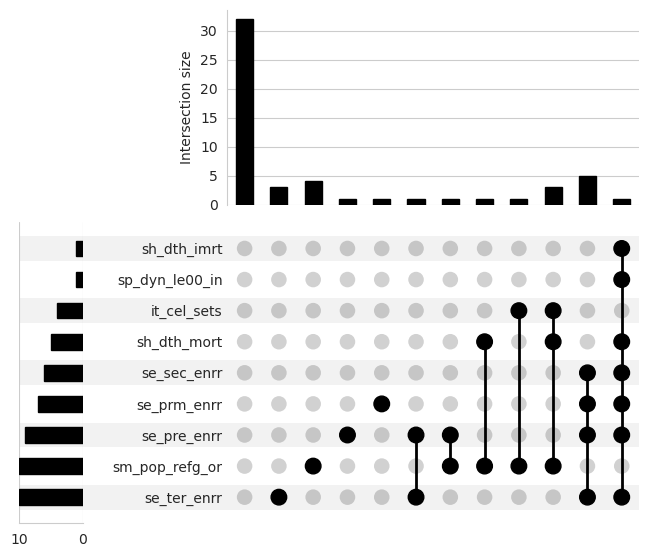

In [58]:
warnings.simplefilter("ignore") # I will ignore the warnings only for this function
arg_di_df_best_cases[columns_with_missing_values].missing.missing_upsetplot()

#### Get rows with missing values

In [59]:
rows_with_missing_values = arg_di_df_best_cases.set_index('year').T.isna().sum().sort_values(ascending=False)
rows_with_missing_values = rows_with_missing_values[rows_with_missing_values > 0].index
rows_with_missing_values

Index([2023, 1989, 2022, 1995, 1993, 1992, 1972, 1973, 1971, 1990, 1970, 1974,
       1978, 1997, 1979, 1975, 1996, 1976, 1977, 1983, 2021, 1988],
      dtype='int64', name='year')

### Shadow matrix

In [60]:
shadow_matrix = arg_di_df_best_cases.missing.bind_shadow_matrix(only_missing = True, true_string="Missing", false_string="Not Missing")
shadow_matrix.head()

,year,it_mlt_main,ny_gdp_mktp_kd,ny_gdp_mktp_kd_zg,ny_gdp_pcap_kd,ny_gdp_pcap_kd_zg,sp_dyn_le00_in,it_cel_sets,sh_dth_imrt,sh_dth_mort,...,year_of_dictatorship,sp_dyn_le00_in_NA,it_cel_sets_NA,sh_dth_imrt_NA,sh_dth_mort_NA,sm_pop_refg_or_NA,se_pre_enrr_NA,se_prm_enrr_NA,se_sec_enrr_NA,se_ter_enrr_NA
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,1,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,1,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,1,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,1,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,0,Not Missing,Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing


Getting descriptive statistics of a variable grouped by  _NA variables

In [61]:
list = [shadow_matrix.groupby(item+"_NA")[arg_di_df_best_cases.columns[0]].describe() for item in columns_with_missing_values]
list

[                count         mean        std     min      25%     50%  \
 se_ter_enrr_NA                                                           
 Missing          10.0  1998.500000  12.989312  1988.0  1990.50  1994.0   
 Not Missing      44.0  1996.045455  16.389098  1970.0  1980.75  1999.5   
 
                     75%     max  
 se_ter_enrr_NA                   
 Missing         1996.75  2023.0  
 Not Missing     2010.25  2021.0  ,
                    count    mean        std     min      25%     50%      75%  \
 sm_pop_refg_or_NA                                                               
 Missing             10.0  1974.5   3.027650  1970.0  1972.25  1974.5  1976.75   
 Not Missing         44.0  2001.5  12.845233  1980.0  1990.75  2001.5  2012.25   
 
                       max  
 sm_pop_refg_or_NA          
 Missing            1979.0  
 Not Missing        2023.0  ,
                 count         mean        std     min     25%     50%     75%  \
 se_pre_enrr_NA             

## Delete variables

### se_prm_ages: Primary school starting age (years)

I'll discard this variable because it always has the same value

In [62]:
print(arg_di_df_best_cases["se_prm_ages"].value_counts())
arg_di_df_best_cases = arg_di_df_best_cases.drop(columns=["se_prm_ages"])

se_prm_ages
6.0    54
Name: count, dtype: int64


### se_sec_durs: Secondary education, duration (years)

I'll discard this variable because the duration of secondary education is different in different provinces

In [63]:
if arg_di_df_best_cases.get("se_sec_durs") is not None:
    print(arg_di_df_best_cases["se_sec_durs"].value_counts())
    arg_di_df_best_cases.drop(columns=["se_sec_durs"], inplace=True)

se_sec_durs
5.0    28
6.0    26
Name: count, dtype: int64


### sp_urb_totl_in_zs: Rural population (% of total population)

In [64]:
arg_di_df_best_cases["sp_urb_totl_in_zs"].corr(arg_di_df_best_cases["sp_rur_totl_zs"])

-1.0

In [65]:
arg_di_df_best_cases.drop(columns=["sp_rur_totl_zs"], inplace=True)

### ny_gdp_mktp_kd: GDP (constant 2015 US$)

In [66]:
arg_di_df_best_cases["ny_gdp_mktp_kd"].corr(arg_di_df_best_cases["ny_gdp_pcap_kd"] * arg_di_df_best_cases["sp_pop_totl"])

1.0

In [67]:
arg_di_df_best_cases.drop(columns=["ny_gdp_mktp_kd"], inplace=True)

### sh_dth_mort: Number of infant deaths

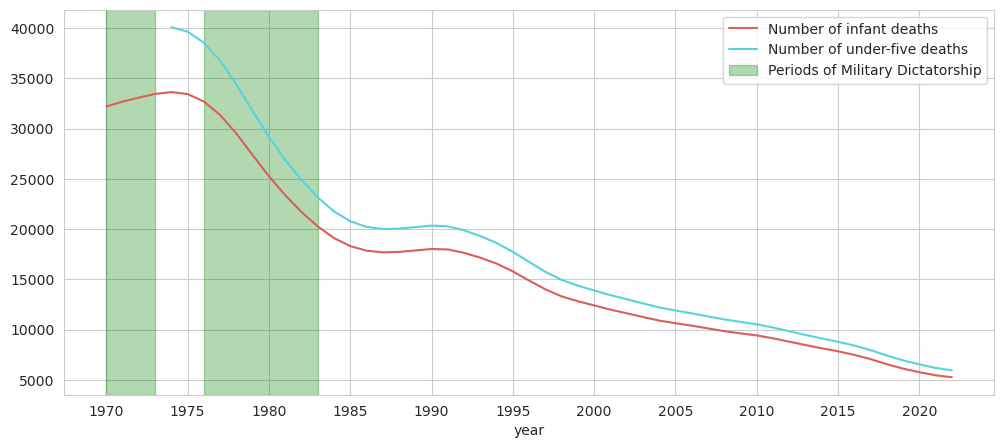

In [68]:
plot_labels = [
    get_indicator_name("sh_dth_imrt",True),
    get_indicator_name("sh_dth_mort",True)
]

time_series(arg_di_df_best_cases, x='year', y=["sh_dth_imrt","sh_dth_mort"], plot_labels=plot_labels)

In [70]:
arg_di_df_best_cases["sh_dth_mort"].corr(arg_di_df_best_cases["sh_dth_imrt"])

0.999535079893433

In [71]:
arg_di_df_best_cases.drop(columns=["sh_dth_mort"], inplace=True)

## Checking variables

### Sum of % of total population by age

In [28]:
arg_di_df_best_cases["sp_pop_00_up_to_zs"] = arg_di_df_best_cases.apply(lambda x: x["sp_pop_0014_to_zs"] + x["sp_pop_1564_to_zs"] + x["sp_pop_65_up_to_zs"], axis=1)

arg_di_df_best_cases[arg_di_df_best_cases["sp_pop_00_up_to_zs"] < 99].shape[0]

0

In [29]:
arg_di_df_best_cases.drop(columns="sp_pop_00_up_to_zs", inplace=True)

### Sum of % of total population by zone

In [30]:
arg_di_df_best_cases["sp_totl_zs"] = arg_di_df_best_cases.apply(lambda x: x["sp_rur_totl_zs"] + x["sp_urb_totl_in_zs"], axis=1)
arg_di_df_best_cases[arg_di_df_best_cases["sp_totl_zs"] < 99].shape[0]

0

In [31]:
arg_di_df_best_cases.drop(columns="sp_totl_zs", inplace=True)

### Calculation of GPD Per Capita

In [32]:
print(arg_di_df_best_cases.shape[0])
arg_di_df_best_cases["ny_gdp_pcap_kd_2"] = arg_di_df_best_cases.apply(lambda x: x["ny_gdp_mktp_kd"] / x["sp_pop_totl"], axis=1)

54


In [33]:
arg_di_df_best_cases[(arg_di_df_best_cases["ny_gdp_pcap_kd"] - arg_di_df_best_cases["ny_gdp_pcap_kd_2"]).abs() < 0.1].shape[0]

54

In [34]:
arg_di_df_best_cases.drop(columns=["ny_gdp_pcap_kd_2"], inplace=True)

### Calculation of GPD Annual Growth (%)

In [35]:
print(arg_di_df_best_cases.shape[0])
arg_di_df_best_cases["ny_gdp_mktp_kd_zg_2"] = arg_di_df_best_cases["ny_gdp_mktp_kd"].pct_change() * 100
arg_di_df_best_cases[["ny_gdp_mktp_kd_zg","ny_gdp_mktp_kd_zg_2"]].head()

54


,ny_gdp_mktp_kd_zg,ny_gdp_mktp_kd_zg_2
10,3.045643,NaN
11,5.658131,5.658131
12,1.628417,1.628417
13,2.811754,2.811754
14,5.533804,5.533804


In [36]:
arg_di_df_best_cases[(arg_di_df_best_cases["ny_gdp_mktp_kd_zg"] - arg_di_df_best_cases["ny_gdp_mktp_kd_zg_2"]).abs() < 0.1].shape[0]

53

In [37]:
arg_di_df_best_cases.drop(columns=["ny_gdp_mktp_kd_zg_2"], inplace=True)

### Calculation of GPD Per Capita Annual Growth (%)

In [38]:
print(arg_di_df_best_cases.shape[0])
arg_di_df_best_cases["ny_gdp_pcap_kd_zg_2"] = arg_di_df_best_cases["ny_gdp_pcap_kd"].pct_change() * 100
arg_di_df_best_cases[["ny_gdp_pcap_kd_zg","ny_gdp_pcap_kd_zg_2"]].head()

54


,ny_gdp_pcap_kd_zg,ny_gdp_pcap_kd_zg_2
10,1.443200,NaN
11,3.998125,3.998125
12,0.020487,0.020487
13,1.136093,1.136093
14,3.754160,3.754160


In [39]:
arg_di_df_best_cases[(arg_di_df_best_cases["ny_gdp_pcap_kd_zg"] - arg_di_df_best_cases["ny_gdp_pcap_kd_zg_2"]).abs() < 0.1].shape[0]

53

In [40]:
arg_di_df_best_cases.drop(columns=["ny_gdp_pcap_kd_zg_2"], inplace=True)

## Create new variables

### GDP Growth categories

|         |         |
|---------|---------|
| Negative growth | -0% |
| Low growth | 0%-2% |
| Moderate growth | 2%-5% |
| High growth | +5% |

In [45]:
arg_di_df_best_cases["ny_gdp_mktp_kd_zg_cat"] = pd.cut(arg_di_df_best_cases["ny_gdp_mktp_kd_zg"], bins=[-np.inf, 0, 2, 5, np.inf], labels=["Negative growth", "Low growth", "Moderate growth", "High growth"])
arg_di_df_best_cases[["ny_gdp_mktp_kd_zg_cat","ny_gdp_mktp_kd_zg"]].head()

,ny_gdp_mktp_kd_zg_cat,ny_gdp_mktp_kd_zg
10,Moderate growth,3.045643
11,High growth,5.658131
12,Low growth,1.628417
13,Moderate growth,2.811754
14,High growth,5.533804


In [46]:
arg_di_df_best_cases["ny_gdp_mktp_kd_zg_cat"].value_counts()

ny_gdp_mktp_kd_zg_cat
Negative growth    22
High growth        19
Moderate growth    10
Low growth          3
Name: count, dtype: int64

In [72]:
set_new_dictionary_entry("GDP growth categories", transform_indicator_code("ny_gdp_mktp_kd_zg_cat"), "ny_gdp_mktp_kd_zg_cat", "Categorías del crecimiento del PBI")

### Life Expectancy categories

|         |         |
|---------|---------|
| Low life expectancy | < 50 years |
| Medium life expectancy | 50-70 years |
| High life expectancy | > 70 years |

In [48]:
arg_di_df_best_cases["sp_dyn_le00_in_cat"] = pd.cut(arg_di_df_best_cases["sp_dyn_le00_in"], bins=[-np.inf, 50, 70, np.inf], labels=["Low life expectancy", "Medium life expectancy", "High life expectancy"])
arg_di_df_best_cases[["sp_dyn_le00_in_cat","sp_dyn_le00_in"]].head()

,sp_dyn_le00_in_cat,sp_dyn_le00_in
10,Medium life expectancy,65.589
11,Medium life expectancy,65.541
12,Medium life expectancy,65.923
13,Medium life expectancy,66.323
14,Medium life expectancy,66.563


In [49]:
arg_di_df_best_cases["sp_dyn_le00_in_cat"].value_counts()

sp_dyn_le00_in_cat
High life expectancy      37
Medium life expectancy    16
Low life expectancy        0
Name: count, dtype: int64

In [73]:
set_new_dictionary_entry("Life Expectancy categories", transform_indicator_code("sp_dyn_le00_in_cat"), "sp_dyn_le00_in_cat", "Categorías de expectativas de vida")

### (Discarded) Inmigration percentage and categories

|         |         |
|---------|---------|
| Low | < 1% |
| Medium | 1%-5% |
| High | > 5% |

In [51]:
arg_di_df_best_cases = arg_di_df_best_cases.assign(sm_pop_refg_pct = lambda x: x["sm_pop_refg"] / x["sp_pop_totl"])
arg_di_df_best_cases["sm_pop_refg_cat"] = pd.cut(arg_di_df_best_cases["sm_pop_refg_pct"], bins=[-np.inf, 0.01, 0.05, np.inf], labels=["Low", "Medium", "High"])
arg_di_df_best_cases[["sm_pop_refg_cat","sm_pop_refg_pct","sm_pop_refg","sp_pop_totl"]].head()

,sm_pop_refg_cat,sm_pop_refg_pct,sm_pop_refg,sp_pop_totl
10,Low,0.001468,35000.0,23842803.0
11,Low,0.001404,34000.0,24223379.0
12,Low,0.001341,33000.0,24612794.0
13,Low,0.001479,37000.0,25020588.0
14,Low,0.001847,47000.0,25449754.0


In [52]:
arg_di_df_best_cases["sm_pop_refg_cat"].value_counts()

sm_pop_refg_cat
Low       54
Medium     0
High       0
Name: count, dtype: int64

This variable will not be useful

In [ ]:
arg_di_df_best_cases.drop(columns="sm_pop_refg_cat",inplace=True)

### (Discarded) Emigration percentage and categories

|         |         |
|---------|---------|
| Low | < 1% of total population as refugees |
| Medium | 1%-5% |
| High | > 5% |

In [54]:
arg_di_df_best_cases = arg_di_df_best_cases.assign(sm_pop_refg_or_pct = lambda x: x["sm_pop_refg_or"] / x["sp_pop_totl"])
arg_di_df_best_cases["sm_pop_refg_or_cat"] = pd.cut(arg_di_df_best_cases["sm_pop_refg_or_pct"], bins=[-np.inf, 0.01, 0.05, np.inf], labels=["Low", "Medium", "High"])
arg_di_df_best_cases[["sm_pop_refg_or_cat","sm_pop_refg_or_pct","sm_pop_refg_or","sp_pop_totl"]].head()

,sm_pop_refg_or_cat,sm_pop_refg_or_pct,sm_pop_refg_or,sp_pop_totl
10,NaN,NaN,NaN,23842803.0
11,NaN,NaN,NaN,24223379.0
12,NaN,NaN,NaN,24612794.0
13,NaN,NaN,NaN,25020588.0
14,NaN,NaN,NaN,25449754.0


In [55]:
arg_di_df_best_cases["sm_pop_refg_or_pct"].isna().value_counts()

sm_pop_refg_or_pct
False    44
True     10
Name: count, dtype: int64

In [56]:
arg_di_df_best_cases["sm_pop_refg_or_cat"].value_counts()

sm_pop_refg_or_cat
Low       44
Medium     0
High       0
Name: count, dtype: int64

This variable will not be useful

In [57]:
arg_di_df_best_cases.drop(columns="sm_pop_refg_or_cat",inplace=True)

### (TO DO):

In [62]:
def it_cel_sets_cat(row):
    year = row['year']
    cell_sets = row['it_cel_sets']
    
    if year < 1985:
        return "Pre-Mobile"
    elif 1985 <= year < 2000:
        return "Early Mobile"
    elif 2000 <= year < 2010:
        return "Mobile Growth"
    else:  # year >= 2010
        return "Smartphone Era"

arg_di_df_best_cases['it_cel_sets_cat'] = arg_di_df_best_cases.apply(it_cel_sets_cat, axis=1)

### (TO DO):

In [63]:
# def se_ter_enrr_cat(row):
#     # Check if tertiary enrollment data exists
#     if pd.isna(row['se_ter_enrr']):
#         return "Unknown"
    
#     tertiary_enrollment = row['se_ter_enrr']
    
#     if tertiary_enrollment < 30:
#         return "Low"
#     elif 30 <= tertiary_enrollment <= 60:
#         return "Medium"
#     else:  # tertiary_enrollment > 60
#         return "High"

# arg_di_df_best_cases['se_ter_enrr_cat'] = arg_di_df_best_cases.apply(se_ter_enrr_cat, axis=1)


### (TO DO):

In [64]:
def sh_dth_imrt_cat(row):
    # Check if infant mortality data exists
    if pd.isna(row['sh_dth_imrt']):
        return "Unknown"
    
    infant_mortality = row['sh_dth_imrt']
    
    if infant_mortality > 25:
        return "Very High"
    elif 15 <= infant_mortality <= 25:
        return "High"
    elif 5 <= infant_mortality <= 15:
        return "Medium"
    else:  # infant_mortality < 5
        return "Low"

arg_di_df_best_cases['sh_dth_imrt_cat'] = arg_di_df_best_cases.apply(sh_dth_imrt_cat, axis=1)


### (TO DO):

In [ ]:
def categorize_income(gdp_per_capita):
    if gdp_per_capita < 3000:
        return "Low income"
    elif gdp_per_capita < 12000:
        return "Middle income"
    else:
        return "High income"

arg_di_df_best_cases["income_level_cat"] = arg_di_df_best_cases["ny_gdp_pcap_kd"].apply(categorize_income)

NameError: name 'df' is not defined

### (TO DO):

In [ ]:

# 2. education_coverage_cat (Promedio de tasas de escolarización)
education_cols = ["se_pre_enrr", "se_prm_enrr", "se_sec_enrr", "se_ter_enrr"]
df["education_coverage_avg"] = df[education_cols].mean(axis=1, skipna=True)

def categorize_education_coverage(avg):
    if avg < 60:
        return "Low coverage"
    elif avg < 90:
        return "Medium coverage"
    else:
        return "High coverage"

arg_di_df_best_cases["education_coverage_cat"] = arg_di_df_best_cases["education_coverage_avg"].apply(categorize_education_coverage)
arg_di_df_best_cases.drop(columns=["education_coverage_avg", inplace=True)


### (TO DO):

In [ ]:

# 3. demographic_dependency_cat (Relación de dependencia)
def calc_dependency(row):
    young = row["sp_pop_0014_to_zs"]
    old = row["sp_pop_65_up_to_zs"]
    working = row["sp_pop_1564_to_zs"]
    if working == 0:
        return np.nan
    dependency_ratio = (young + old) / working * 100
    if dependency_ratio < 50:
        return "Low dependency"
    elif dependency_ratio < 70:
        return "Medium dependency"
    else:
        return "High dependency"

arg_di_df_best_cases["demographic_dependency_cat"] = arg_di_df_best_cases.apply(calc_dependency, axis=1)


### (TO DO):

In [ ]:

# 4. gdp_growth_volatility_cat (Volatilidad del crecimiento del PBI)
arg_di_df_best_cases["gdp_growth_volatility"] = arg_di_df_best_cases["ny_gdp_mktp_kd_zg"].rolling(window=5, min_periods=3).std()

def categorize_volatility(std):
    if pd.isna(std):
        return np.nan
    elif std < 2:
        return "Low volatility"
    elif std < 4:
        return "Medium volatility"
    else:
        return "High volatility"

arg_di_df_best_cases["gdp_growth_volatility_cat"] = arg_di_df_best_cases["gdp_growth_volatility"].apply(categorize_volatility)

# (Opcional) Eliminar columnas intermedias si no las querés conservar
arg_di_df_best_cases.drop(columns=["gdp_growth_volatility"], inplace=True)

## Plots

### Heatmap of correlation between variables

<Axes: >

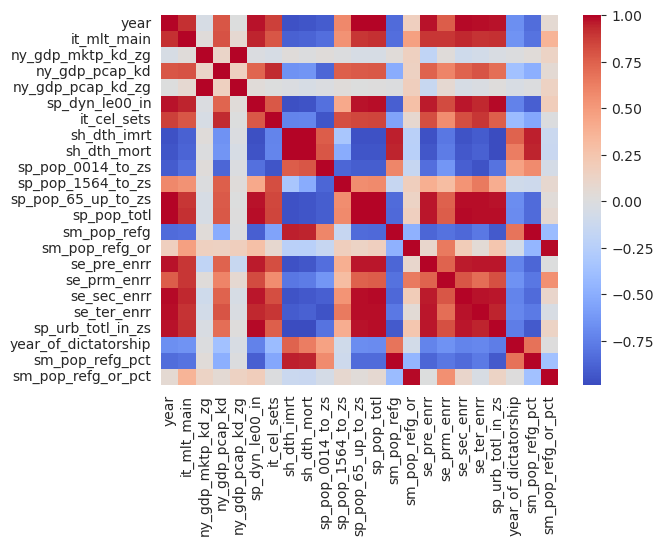

In [ ]:
correlation_matrix = arg_di_df_best_cases.corr(numeric_only=True)

sns.heatmap(correlation_matrix, cmap='coolwarm')

### Time series

#### Population

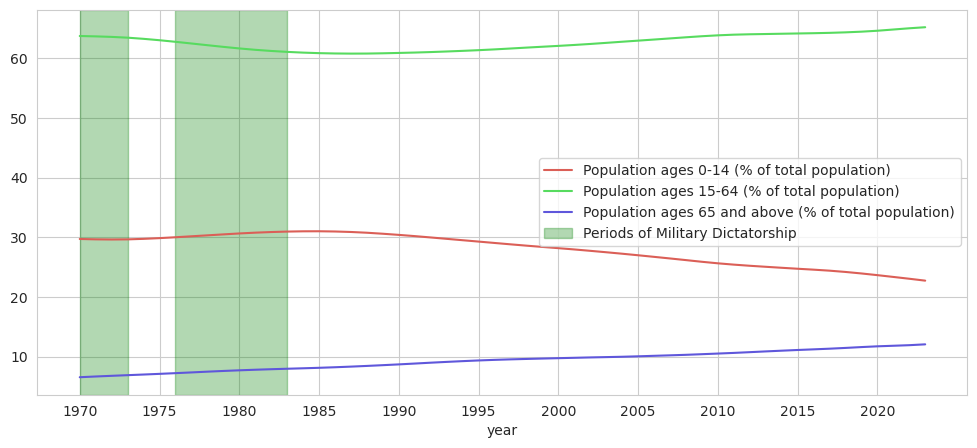

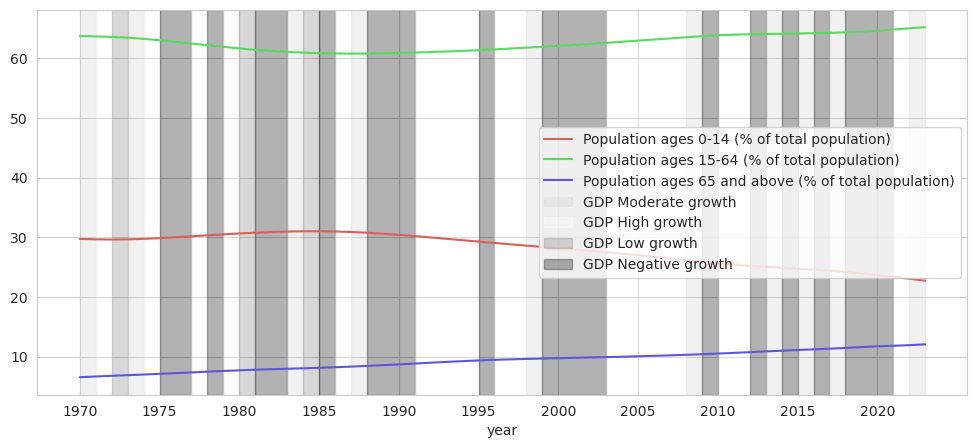

In [ ]:
plot_labels = [
    get_indicator_name("sp_pop_0014_to_zs",True),
    get_indicator_name("sp_pop_1564_to_zs",True),
    get_indicator_name("sp_pop_65_up_to_zs",True)
]

time_series(arg_di_df_best_cases, x='year', y=["sp_pop_0014_to_zs","sp_pop_1564_to_zs","sp_pop_65_up_to_zs"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["sp_pop_0014_to_zs","sp_pop_1564_to_zs","sp_pop_65_up_to_zs"], plot_labels=plot_labels, background_colors="gdp_growth")

#### Enrollment

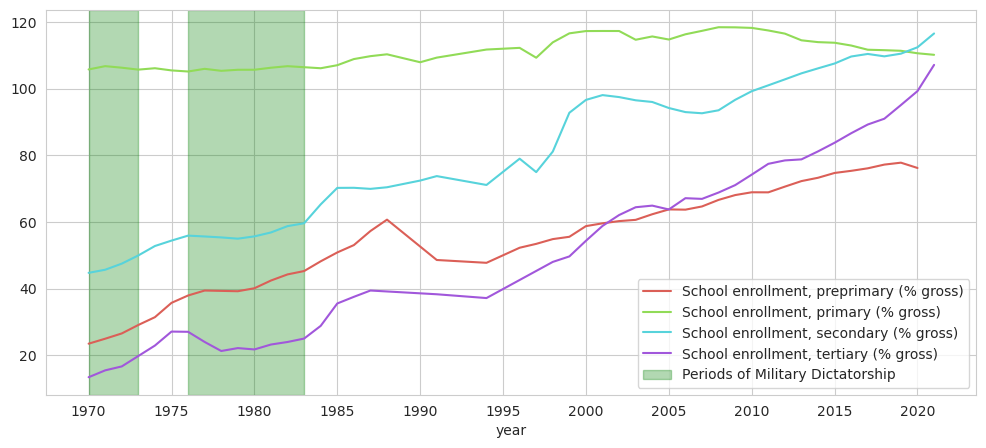

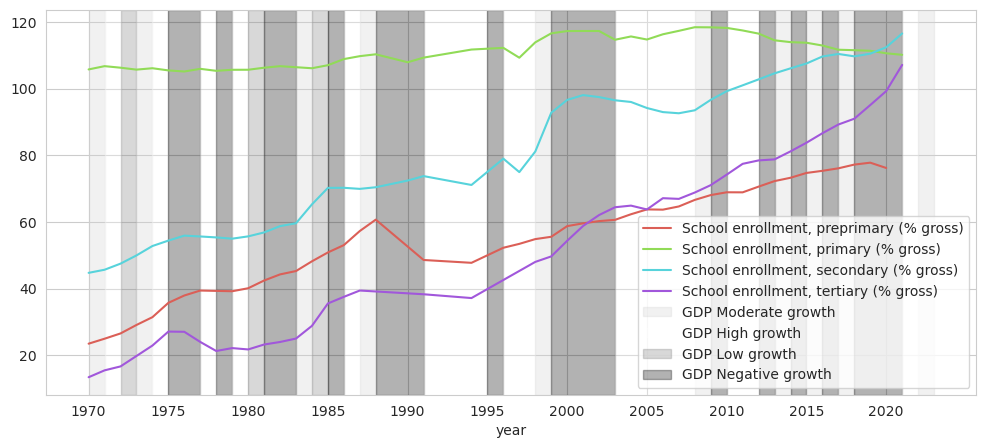

In [ ]:
plot_labels = [
    get_indicator_name("se_pre_enrr",True),
    get_indicator_name("se_prm_enrr",True),
    get_indicator_name("se_sec_enrr",True),
    get_indicator_name("se_ter_enrr",True)
]

time_series(arg_di_df_best_cases, x='year', y=["se_pre_enrr","se_prm_enrr","se_sec_enrr","se_ter_enrr"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["se_pre_enrr","se_prm_enrr","se_sec_enrr","se_ter_enrr"], plot_labels=plot_labels, background_colors="gdp_growth")

#### Life expectancy vs. % of urban population

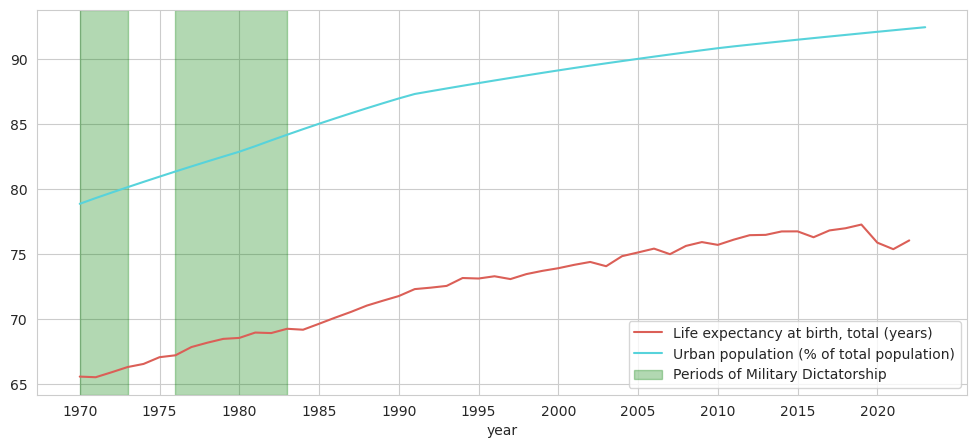

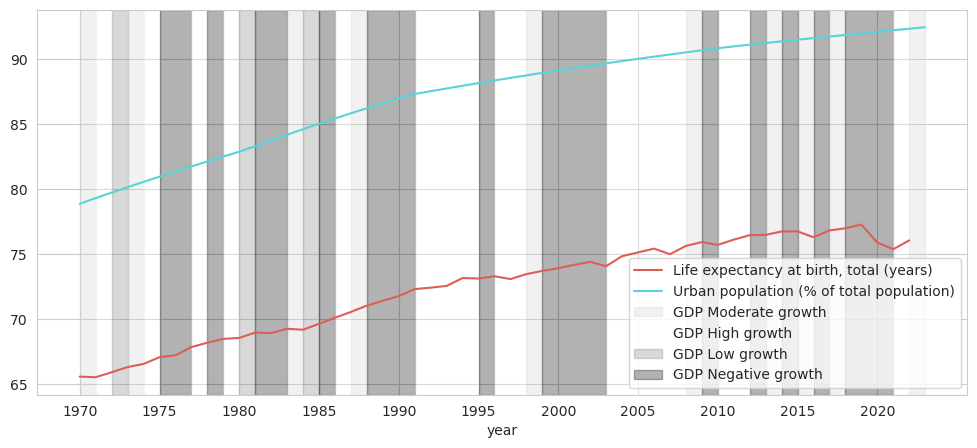

In [ ]:
plot_labels = [
    get_indicator_name("sp_dyn_le00_in",True),
    get_indicator_name("sp_urb_totl_in_zs",True)
]

time_series(arg_di_df_best_cases, x='year', y=["sp_dyn_le00_in","sp_urb_totl_in_zs"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["sp_dyn_le00_in","sp_urb_totl_in_zs"], plot_labels=plot_labels, background_colors="gdp_growth")

#### GDP Growth vs. GDP Per Capita Growth

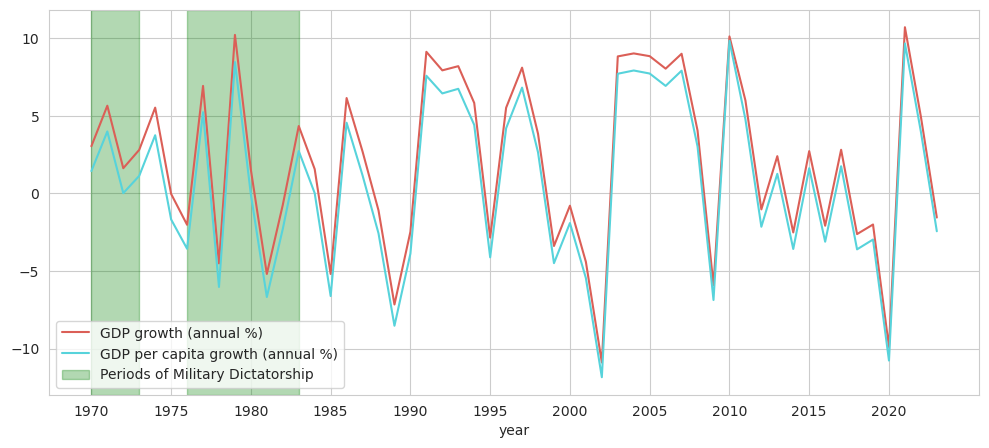

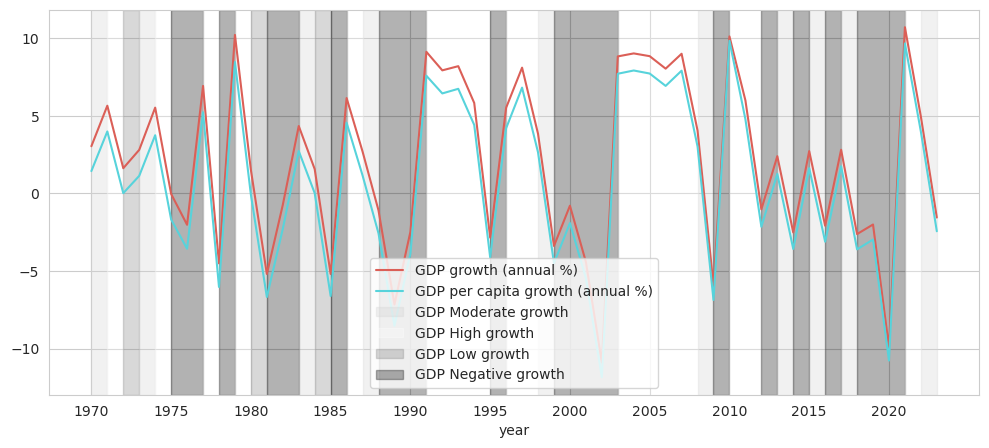

In [ ]:
plot_labels = [
    get_indicator_name("ny_gdp_mktp_kd_zg",True),
    get_indicator_name("ny_gdp_pcap_kd_zg",True)
]

time_series(arg_di_df_best_cases, x='year', y=["ny_gdp_mktp_kd_zg","ny_gdp_pcap_kd_zg"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["ny_gdp_mktp_kd_zg","ny_gdp_pcap_kd_zg"], plot_labels=plot_labels, background_colors="gdp_growth")

#### Fixed telephone subscriptions vs. Mobile cellular subscriptions

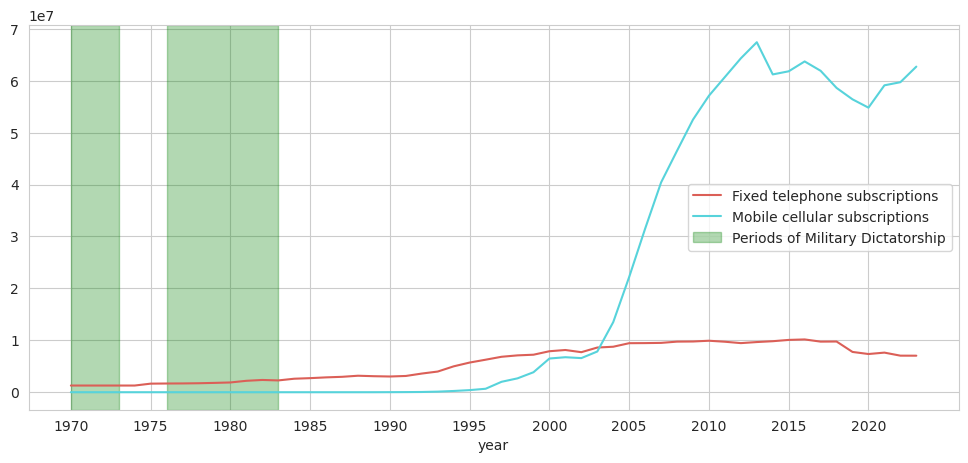

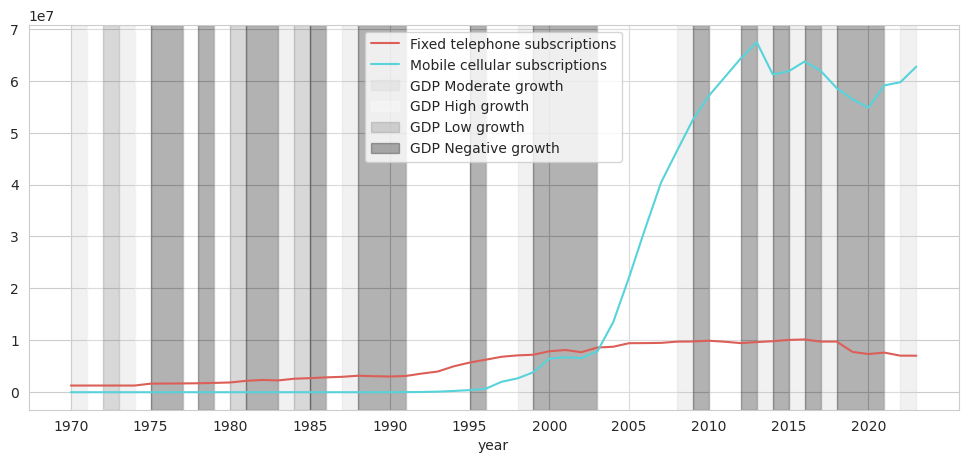

In [ ]:
plot_labels = [
    get_indicator_name("it_mlt_main",True),
    get_indicator_name("it_cel_sets",True)
]

time_series(arg_di_df_best_cases, x='year', y=["it_mlt_main","it_cel_sets"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["it_mlt_main","it_cel_sets"], plot_labels=plot_labels, background_colors="gdp_growth")

#### Emigration

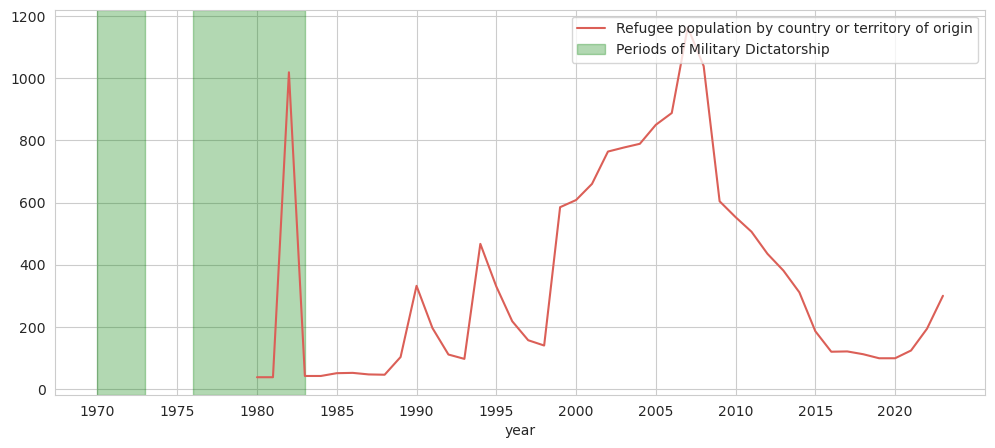

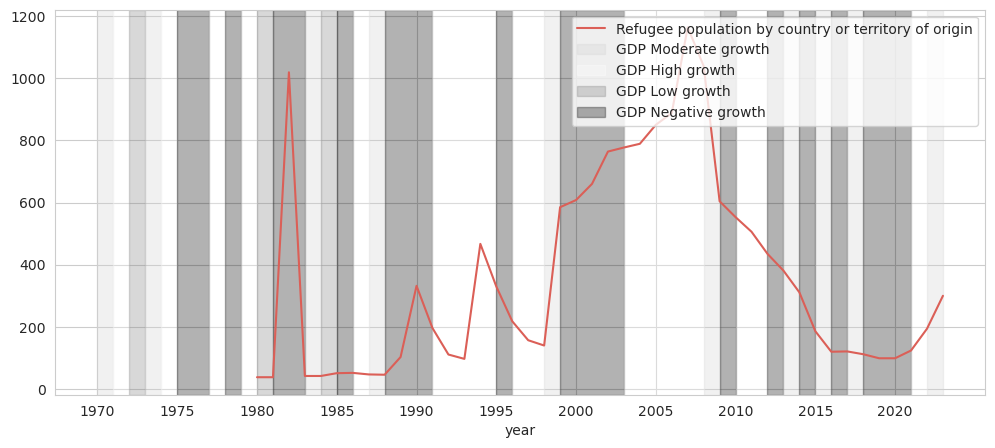

In [ ]:
plot_labels = [
    get_indicator_name("sm_pop_refg_or",True),
]

time_series(arg_di_df_best_cases, x='year', y=["sm_pop_refg_or"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["sm_pop_refg_or"], plot_labels=plot_labels, background_colors="gdp_growth")

#### Immigration

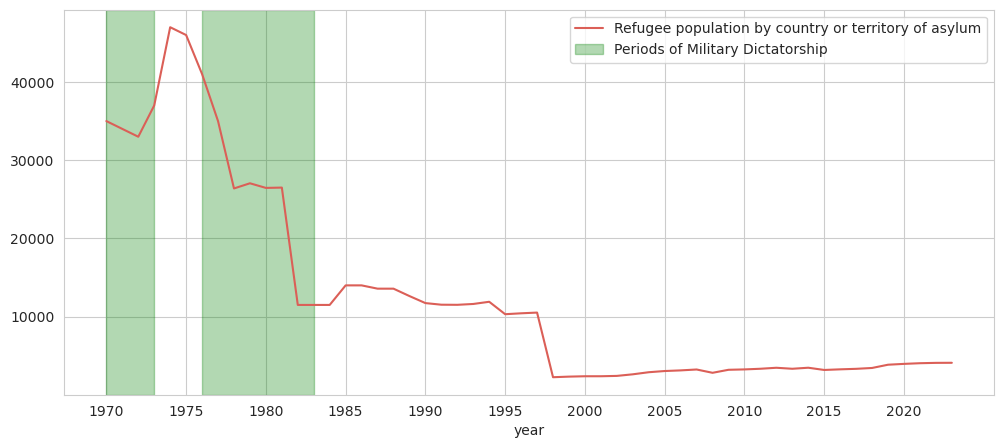

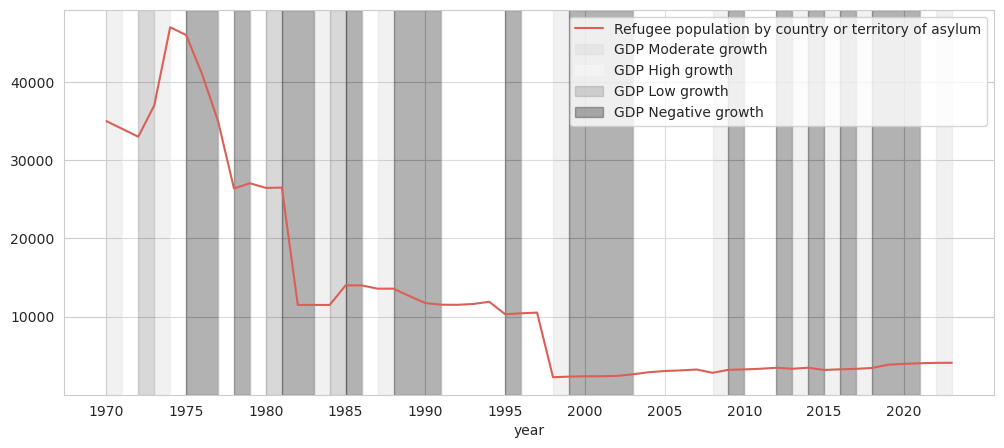

In [ ]:
plot_labels = [
    get_indicator_name("sm_pop_refg",True),
]

time_series(arg_di_df_best_cases, x='year', y=["sm_pop_refg"], plot_labels=plot_labels)
time_series(arg_di_df_best_cases, x='year', y=["sm_pop_refg"], plot_labels=plot_labels, background_colors="gdp_growth")

## Detect outliers

In [ ]:
detect_outliers(arg_di_df_best_cases)

Outlier detection
sh_dth_mort
    year  sh_dth_mort
14  1974      40082.0
15  1975      39640.0
16  1976      38536.0
17  1977      36750.0
sm_pop_refg
    year  sm_pop_refg
10  1970      35000.0
11  1971      34000.0
12  1972      33000.0
13  1973      37000.0
14  1974      47000.0
15  1975      46000.0
16  1976      41010.0
17  1977      35000.0
sm_pop_refg_pct
    year  sm_pop_refg_pct
10  1970         0.001468
11  1971         0.001404
12  1972         0.001341
13  1973         0.001479
14  1974         0.001847
15  1975         0.001778
16  1976         0.001560
17  1977         0.001310
sm_pop_refg_or_pct
    year  sm_pop_refg_or_pct
22  1982            0.000035


I will keep the original values, because these values ​​seem reasonable compared to the consecutive ones 

## Plot variables separated by _NA variables

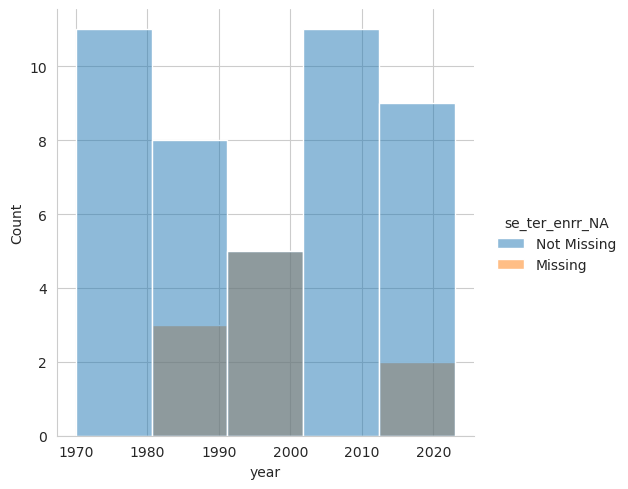

In [ ]:
sns.displot(data=shadow_matrix,x=arg_di_df_best_cases.columns[0],kind="hist",hue=columns_with_missing_values[0]+"_NA",bins=5)

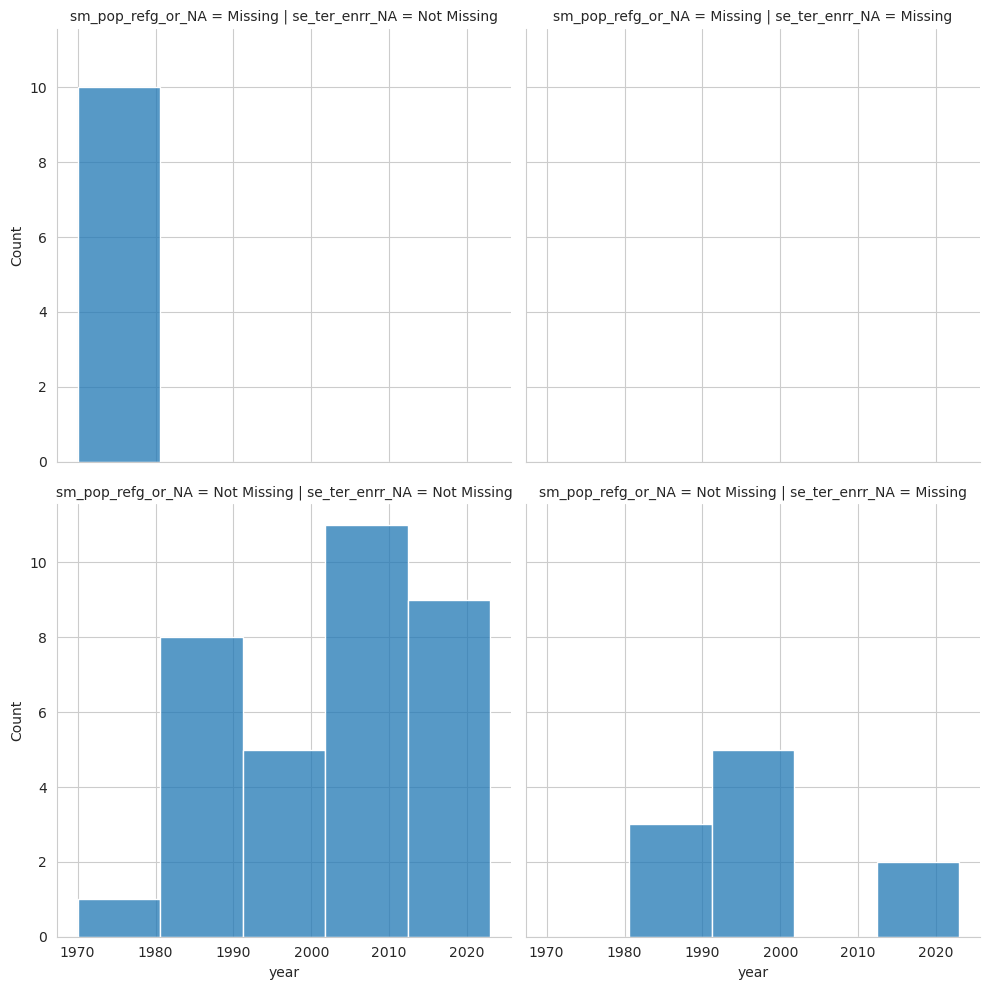

In [ ]:
plot_2_missing_vs_variable(shadow_matrix,shadow_matrix.columns[0],columns_with_missing_values[0]+"_NA",columns_with_missing_values[1]+"_NA", bins=5)

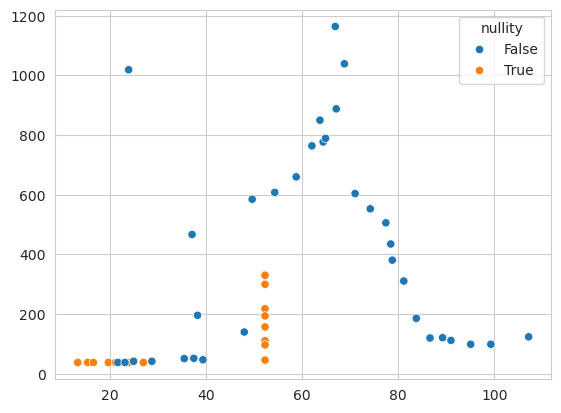

In [ ]:
plot_2_missing(shadow_matrix, columns_with_missing_values[0]+"_NA", columns_with_missing_values[1]+"_NA")

## Imputation

### Imputation by interpolation

In [ ]:
print(arg_di_df_best_cases.iloc[0:10][['year','it_cel_sets']])
arg_di_df_best_cases['it_cel_sets'].isna().value_counts()

    year  it_cel_sets
10  1970          0.0
11  1971          0.0
12  1972          0.0
13  1973          0.0
14  1974          0.0
15  1975          0.0
16  1976          0.0
17  1977          0.0
18  1978          0.0
19  1979          0.0


it_cel_sets
False    54
Name: count, dtype: int64

In [ ]:
arg_di_df_best_cases['it_cel_sets'] = arg_di_df_best_cases['it_cel_sets'].ffill()
print(arg_di_df_best_cases.iloc[0:10][['year','it_cel_sets']])
arg_di_df_best_cases['it_cel_sets'].isna().value_counts()

    year  it_cel_sets
10  1970          0.0
11  1971          0.0
12  1972          0.0
13  1973          0.0
14  1974          0.0
15  1975          0.0
16  1976          0.0
17  1977          0.0
18  1978          0.0
19  1979          0.0


it_cel_sets
False    54
Name: count, dtype: int64

## Imputation by mean

For a single value

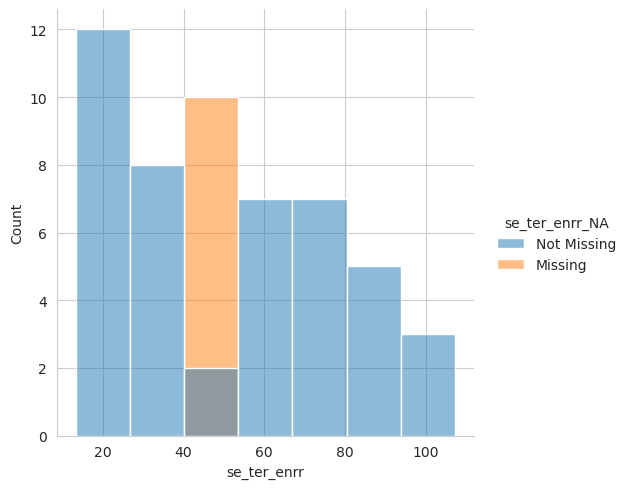

In [ ]:
imputation_of_missing_variable(shadow_matrix, columns_with_missing_values[0])


In [ ]:
arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index=False)

In [ ]:
session_info.show()

KeyError: 'backports'